<a href="https://colab.research.google.com/github/bettyIA86/Proyecto1/blob/main/CalidadAire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("London_Air_Quality.csv")

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000
mean,207.236318,475.114428,31.844216,4.631095,33.056592,12.333209,16.940983,31.165007
std,64.261368,44.233857,19.892013,4.090971,23.223567,9.525674,11.167706,14.900269
min,113.000000,435.000000,1.800000,0.300000,0.000000,0.800000,1.200000,11.250000
25%,163.000000,450.000000,15.200000,1.800000,10.000000,5.000000,8.300000,21.466251
50%,185.000000,458.000000,28.500000,3.100000,34.000000,8.900000,13.000000,25.599998
75%,241.000000,482.000000,45.500000,6.400000,54.000000,17.600000,23.500000,34.693749
max,536.000000,786.000000,87.400000,24.700000,81.000000,45.100000,55.100000,70.370010


In [2]:
#Filtrar el AQI por un día
fecha_inicio = '2024-01-01'
fecha_fin = '2024-06-30'
df_filtrado = df[(df['Date'] >= fecha_inicio) & (df['Date'] <= fecha_fin)].copy()

In [3]:
df_filtrado['Date'] = pd.to_datetime(df_filtrado['Date'])


In [4]:
df_filtrado['Dia'] = df_filtrado['Date'].dt.day
df_filtrado['Mes'] = df_filtrado['Date'].dt.month

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Seleccionar características relevantes para la predicción
features = ['Dia','Mes']
X = df_filtrado[features] # Variables independientes
y = df_filtrado['AQI']   # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Crear instancias de los modelos
lr = LinearRegression()  # Regresión Lineal
dt = DecisionTreeRegressor()  # Árbol de Decisión
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest

In [7]:
# Diccionario para almacenar los modelos
models = {
    'Linear Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf
}

# Entrenar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

results = {}
resul_pred = {}
# Evaluar cada modelo
for name, model in models.items():
    y_pred = model.predict(X_test)  # Hacer predicciones
    resul_pred[name] = (X_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
    r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación
    results[name] = (rmse, r2)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")

Linear Regression: RMSE = 62.24, R² = 0.01
Decision Tree: RMSE = 24.02, R² = 0.62
Random Forest: RMSE = 24.00, R² = 0.62


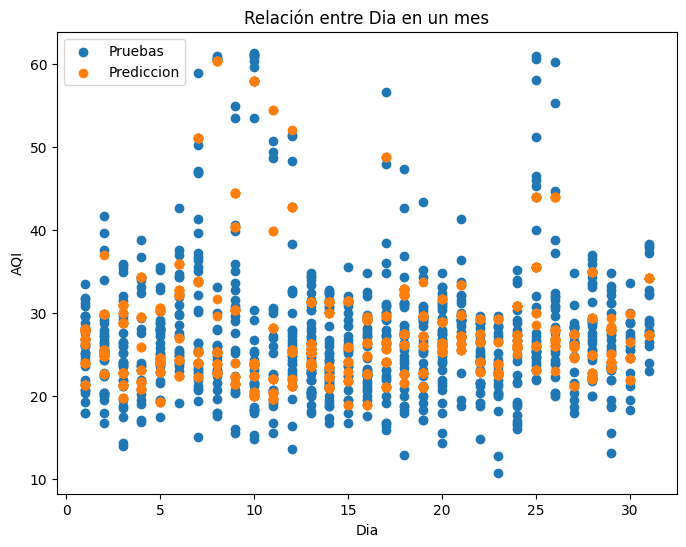

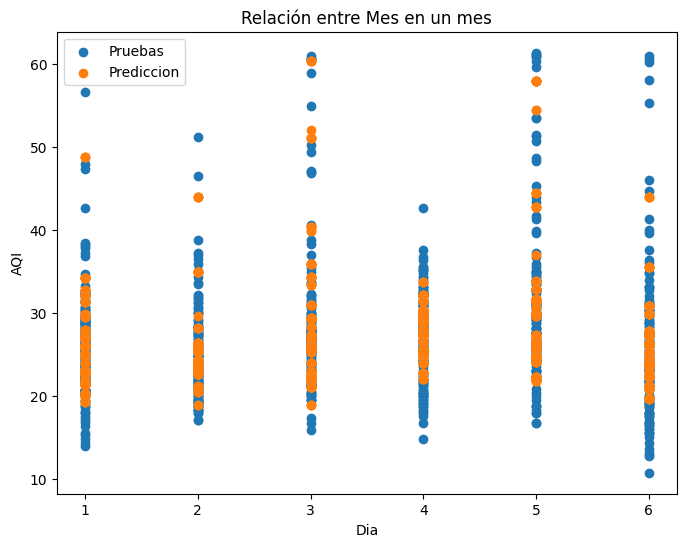

In [10]:
#Graficar Prediccion
# Get the names of the features
import matplotlib.pyplot as plt
features = X_test.columns

# Loop through each feature and create a scatter plot
for feature in features:
    plt.figure(figsize=(8, 6)) # Create a new figure for each plot
    plt.scatter(X_test[feature], y_test, label="Pruebas")
    plt.scatter(X_test[feature], y_pred, label="Prediccion")
    plt.legend()
    plt.title(f"Relación entre {feature} en un mes") # Dynamic title
    plt.xlabel('Dia') # Dynamic x-axis label
    plt.ylabel('AQI')
    plt.show()

In [11]:
import numpy as np
dia = 15
mes = 8
array = np.array([[dia,mes]])
for name, model in models.items():
    y_pred = model.predict(array)
    print(f'{name} es:{y_pred}')





Linear Regression es:[29.02955311]
Decision Tree es:[24.21052647]
Random Forest es:[24.08583492]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
